In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace=True)

In [5]:
d=data

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [6]:
split1 = int(len(data)*.6)
split2 = int(len(data)*.9)
data_in = d[:split1]
data_out = d[split1:split2]
data_hold = d[split2:]

In [7]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [8]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [9]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [10]:
import matplotlib.pyplot as plt

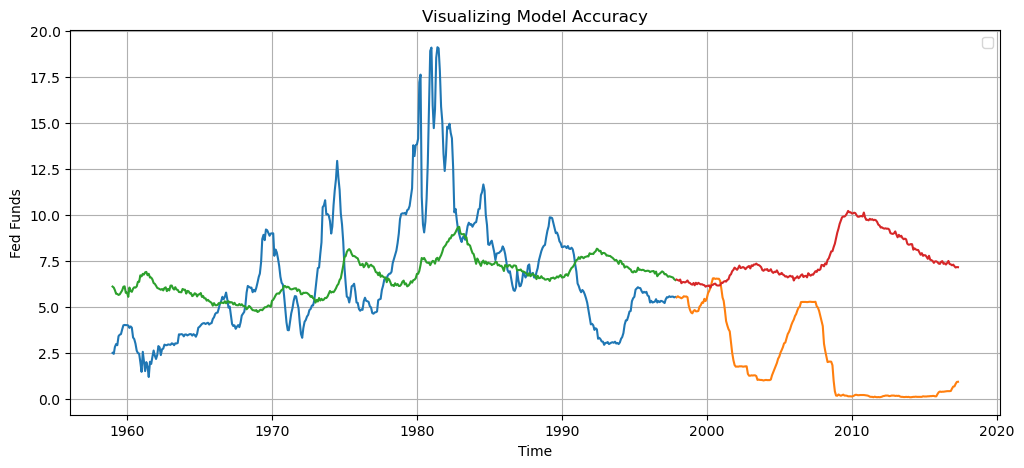

In [11]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [14]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
PolynomialFeatures?

In [17]:
max_degrees=3

DEGREES:  3


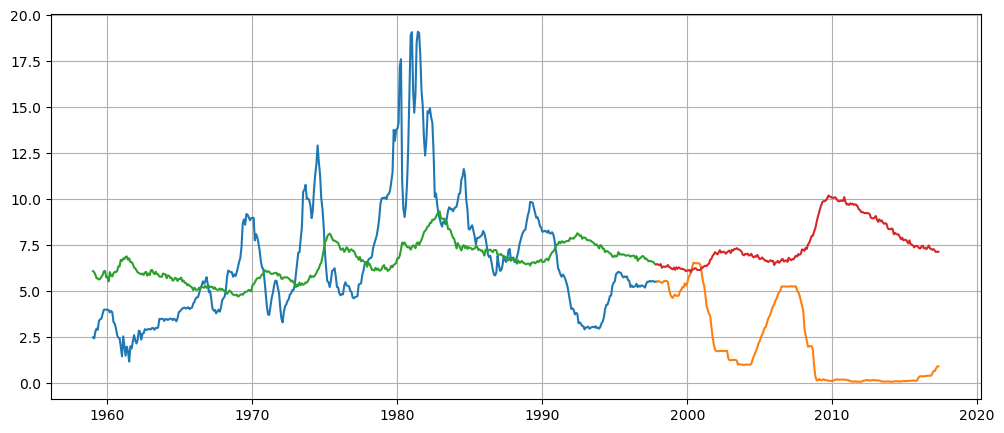

Insample MSE:  10.071422013168643
Outsample MSE:  40.36082783566789
___________________________________
DEGREES:  3


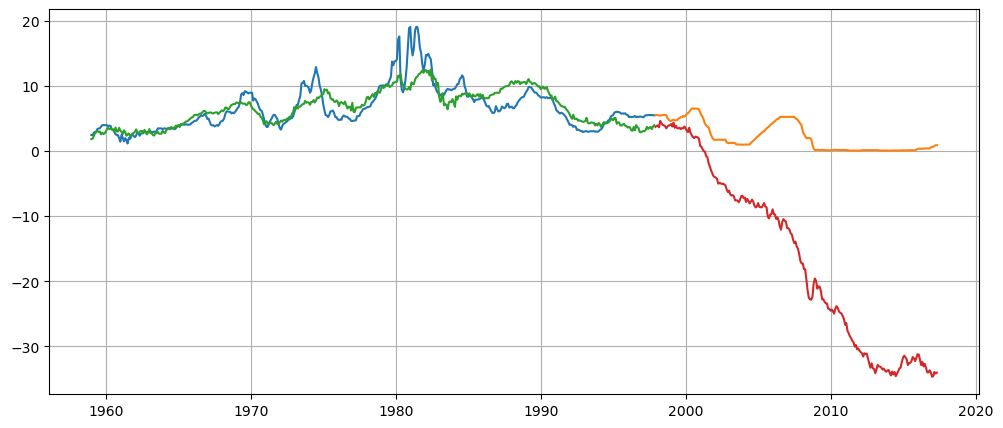

Insample MSE:  3.8634771392760694
Outsample MSE:  481.4465099288575
___________________________________
DEGREES:  3


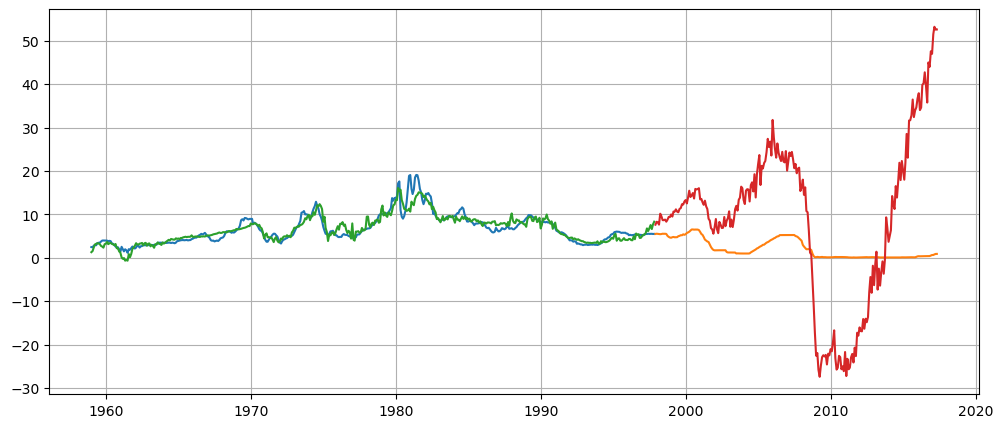

Insample MSE:  1.8723636267299308
Outsample MSE:  371.76787118814127
___________________________________


In [19]:
for degrees in range(1,1+max_degrees):
    print("DEGREES: ", max_degrees)
    poly=PolynomialFeatures(degree=degrees)
    X_in_poly=poly.fit_transform(X_in)
    X_out_poly=poly.transform(X_out)
    
    #Q3.) 
    model1=sm.OLS(y_in,X_in_poly).fit()
    
    #Q4.) 
    plt.figure(figsize=(12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds=pd.DataFrame(in_preds, index=y_in.index)
    out_preds=model1.predict(X_out_poly)
    out_preds=pd.DataFrame(out_preds, index=y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    plt.ylabel
    plt.xlabel
    plt.title
    plt.legend
    plt.grid()
    plt.show()
    
    
    #Q5.) 
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE: ",in_mse_1)
    print("Outsample MSE: ",out_mse_1)
    print("___________________________________")

# 7.) State your observations :

Our model is clearly overtuned on the original piece of data that we are analyzing, and as such while the bias is low in the model there is an excessive issue with the variance of the model with the MSE being many magnitudes larger in relation to the in sample MSE. This ultimately means that our model displays two different things. It is not only highly biased, as evidenced by comparing the actual line to the predicted line, but it is also high in variance. We need to work on a more fitting, possibly less complex model that accurately is able to guess the Taylor Rule instead of the predictins being highly variable. This might include the need of cesnored ortruncated regression, at least the time series version of that. 